##### Quantum Computing 2025/2026
### Lecture 3 - Deutsch Algorithm

<!-- no toc -->
### Contents 

1. [Deutsch's Algorithm](#Deutsch)
2. [Deutsch-Jozsa Algorithm](#Deutsch-jozsa)

### 1. Deutsch's Algorithm <a id="Deutsch"></a>

Let's consider a Boolean function $f:\{0,1\} \rightarrow \{0,1\}$ that can either be balanced or constant.

- **Constant**: its output is always 0 or always 1
- **Balanced**: outputs 0 for one input and 1 for the other


<p align="center">
  <img width="600" height="300" src="images/balanced_vs_constant.png">
</p>

<p align="center">
  <img width="600" height="200" src="images/deutsch.png">
</p>

$U_f$ is our function, usually seen as an oracle, or a black-box function that we want to find if it's balanced or constant


The result for the measurement of the first qubit will be:

* $P(0)=1$ if the function is **constant**
* $P(1)=1$ if the function is **balanced**

#### Implement every function and check if it's balanced or constant


In [2]:
import pennylane as qml

In [6]:
def function(qubit_input, ancilla,id=0):
    if id == 0:
        pass
    elif id == 1:
        qml.PauliX(wires=ancilla)
    elif id == 2:
        qml.CNOT(wires=[qubit_input, ancilla])
    elif id == 3:
        qml.PauliX(wires=qubit_input)
        qml.CNOT(wires=[qubit_input, ancilla])
        qml.PauliX(wires=qubit_input)


In [7]:

def Deutsch(qubit_input, ancilla, id=0):

    #superposition and ancilla
    qml.Hadamard(wires=qubit_input)

    qml.PauliX(wires=ancilla)
    qml.Hadamard(wires=ancilla)

    #function
    function(qubit_input, ancilla, id=id)

    #interference
    qml.Hadamard(wires=qubit_input)

    #return
    return qml.probs(wires=qubit_input)
    


In [8]:
#device
qubit_input = ["ze"]
ancilla = ["ancilla"]

dev = qml.device("default.qubit" , wires=qubit_input+ancilla) 


#qnode
qc = qml.QNode(Deutsch , dev)





(<Figure size 700x300 with 1 Axes>, <Axes: >)

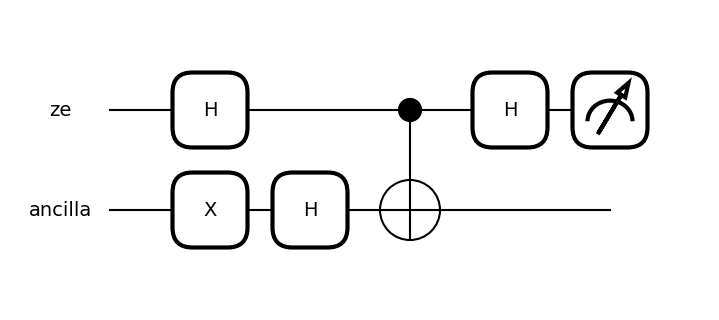

In [10]:
qml.draw_mpl(qc)(qubit_input[0] , ancilla[0], id=2)

In [11]:
qc(qubit_input[0] , ancilla[0] , id=1)

array([1., 0.])

### 3. Deutsch-Jozsa Algorithm <a id="Deutsch-jozsa"></a>

Deutsch-Josza algorithm is the generalization of the previous algorithm for boolean functions for $n$ bit strings rather than single bit string inputs.

<p align="center">
  <img width="700" height="200" src="images/dj.png">
</p>

The results for the single input case also remain true in this setting with minor differences:

* Hadamard uniform superposition over all qubits instead of a single qubit
* We will measure all input qubits instead of the single qubit
* $P(000 \dots 0)=1$ if the function is **constant**
* $P(000 \dots 0)=0$ if the function is **balanced**




#### Implement Deuscht-Jozsa Algorithm 

In [ ]:
def f():



    

In [ ]:
def Deutsch_Jozsa(f, qubits_input, ancilla):


    #ancilla

    #function
    
    #interference



In [ ]:
#qubits input

#nacilla

#device

#qcircuit

#draw circuit

#### Implement the Deutsch-Josza algorithm for the 3-bit string function with truth table 

|x_0|x_1|y|        
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

Consider the following 3-qubit input state truth table:

| Input | Output |
|-------|--------|
| 000   | 1      |
| 001   | 1      |
| 010   | 1      |
| 011   | 1      |
| 100   | 0      |
| 101   | 0      |
| 110   | 0      |
| 111   | 0      |

How may we implement the function? 

```python

dev = qml.device("default.qubit", wires=5)

@qml.qnode(dev)
def circuit():
    qml.MultiControlledX(control_wires=[0, 1, 2, 3], wires=4)
    return 

# qubits 0, 1, 2 and 3 are the control qubits and qubit 4 is the target qubit

```

